1. Import Dependencies and Setup

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

2. Load Data 

In [11]:
data_dir = "data/image"
classes = os.listdir(data_dir)
classes

['NORMAL', 'PNEUMONIA']

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 5856 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
images, labels = batch
images.shape, labels

((32, 256, 256, 3),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32))

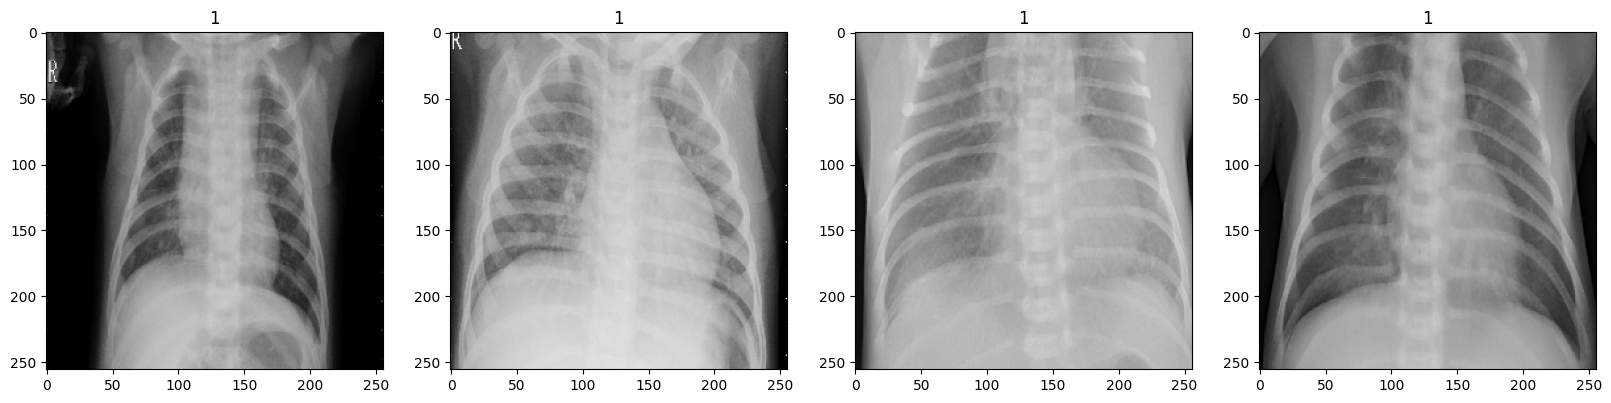

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
batch[0].min() ,batch[0].max()

(np.float32(0.0), np.float32(255.0))

3. Data Preprocessing & Scaling

In [16]:
scaled = batch[0] / 255.0
scaled.min(), scaled.max()

(np.float32(0.0), np.float32(1.0))

In [17]:
data = data.map(lambda x, y: (x / 255.0, y))

In [18]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
images, labels = batch
images.shape, labels

((32, 256, 256, 3),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32))

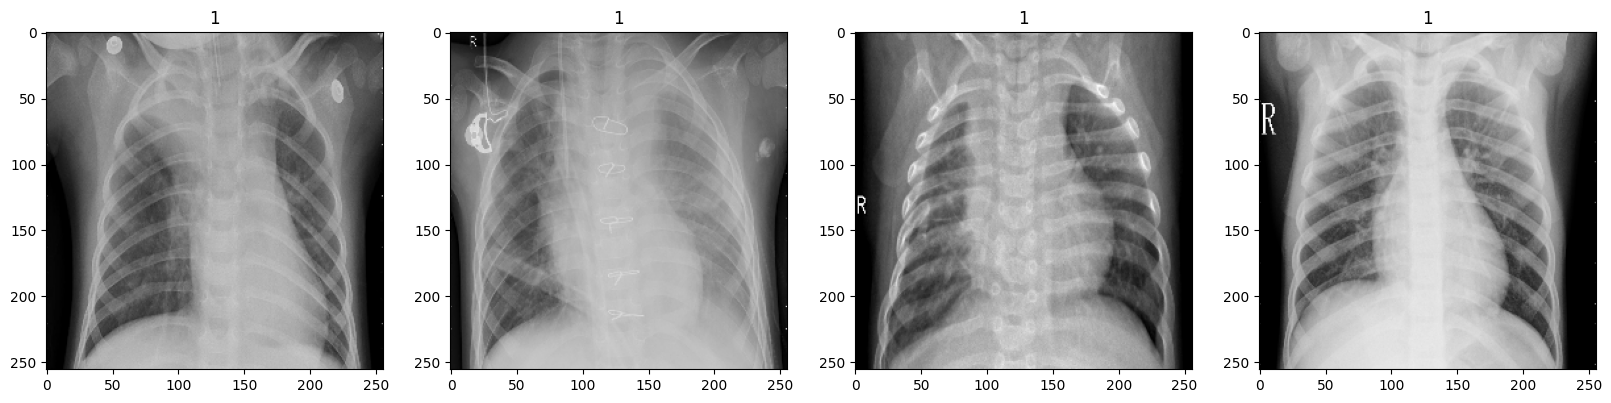

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

4. Splitting Data into Training, Valuating and Testing Sets